In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Basic exploration
print("Feature names:", wine.feature_names)
print("\nClass distribution:\n", y.value_counts())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")


k=1, Accuracy=0.7778
k=5, Accuracy=0.7222
k=11, Accuracy=0.7500
k=15, Accuracy=0.7500
k=21, Accuracy=0.7778


In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier

r_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in r_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    try:
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        rnn_accuracies.append(acc)
        print(f"Radius={r}, Accuracy={acc:.4f}")
    except Exception as e:
        print(f"Radius={r} failed: {e}")
        rnn_accuracies.append(0)


Radius=350, Accuracy=0.7500
Radius=400, Accuracy=0.7222
Radius=450, Accuracy=0.7222
Radius=500, Accuracy=0.7222
Radius=550, Accuracy=0.7222
Radius=600, Accuracy=0.7222


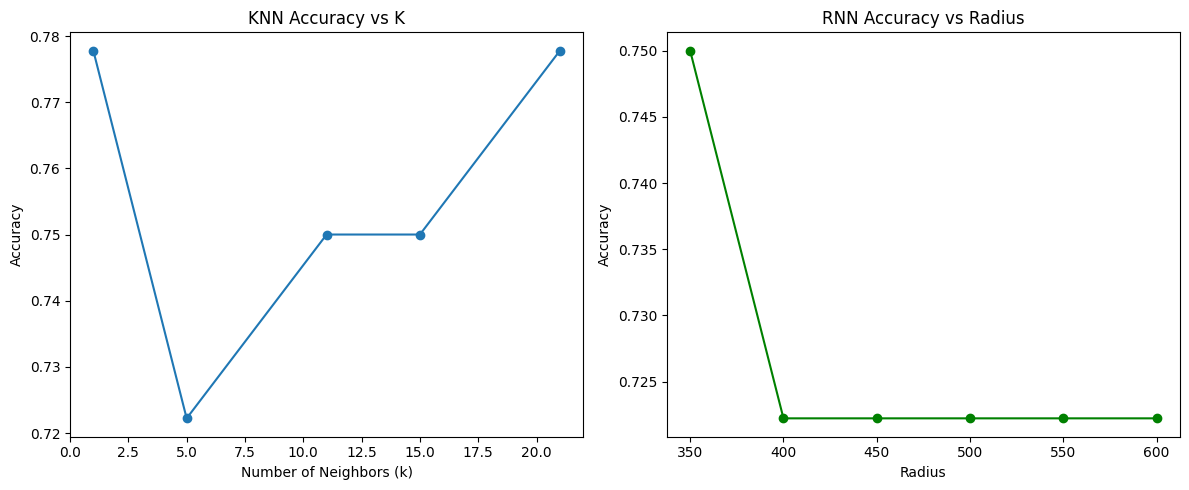

In [4]:
plt.figure(figsize=(12, 5))

# KNN Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")

# RNN Plot
plt.subplot(1, 2, 2)
plt.plot(r_values, rnn_accuracies, marker='o', color='green')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()
